In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# What Does India's 2001 Census Data Tell Us About Literacy and Poverty?

This dataset came from Kaggle https://www.kaggle.com/bazuka/census2001/home and contains 2001 census data from India. The set was populated from several PDFs containing India's census data which can be found here: http://www.censusindia.gov.in/(S(ogvuk1y2e5sueoyc5eyc0g55))/Tables_Published/Basic_Data_Sheet.aspx

Additional information was found on Wikipedia.

This database has been extracted from Census of 2001 and includes data of 590 districts, having around 80 variables each, including the State, District, population, male to female ratio, the growth change from the 1991 census, as well as access to essential things like busses, telegraph/telephone facilities, health care centers, and permanent housing. The dataset also explores literacy and education level. 

India is such a remarkable country due to the vastness of the people who live there, as well as the country itself. As it hosted, as of 2001, over a billion people, 122 major languages, and 1599 other languages according to the 2001 census data. The total population of India was counted as 1,028,737,436 consisting of 532,223,090 males and 496,514,346 females. Total population increased by 182,310,397, 21.5% more than the 846,427,039 people counted during the 1991 census.

I will be exploring the population of India, as well as the sex ratio in India and the literacy rate, and how it is impacted by poverty and religion.

In [88]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

In [89]:
india_census = pd.read_csv('all.csv')
india_census = india_census.drop(['Unnamed: 0'], axis=1)

# Since not everyone is familiar with abbreviations for Indian States,
# I am choosing to expand the given abbreviations into the full state names


india_census.State.replace(['AN', 'CG', 'D_D', 'D_N_H', 'JK', 'MP', 
                            'TN', 'UP','WB', 'HP', 'ArunachalPradesh'], 
                           ['Andaman and Nicobar', 'Chhattisgarh', 'Daman and Diu', 'Dadra and Nagar Haveli', 
                            'Jammu and Kashmir', 'Madhya Pradesh', 'Tamil Nadu', 'Uttar Pradesh','West Bengal', 
                            'Himachal Pradesh', 'Arunachal Pradesh'], inplace=True)

india_census.head()

,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,...,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,Andaman and Nicobar,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,-,-,...,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,Andaman and Nicobar,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,-,-,-,...,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,NaN,NaN,NaN,...,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,NaN,NaN,NaN,...,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,NaN,NaN,NaN,...,863,70,475,795.0,912,823,218,55.8,36.4,7.8


## 1. How Does the Country's Population Vary By State?

India's population in 2001 was over 1 billion people over 29 states. How does the population vary by state? How has the population changed since the 1991 census?

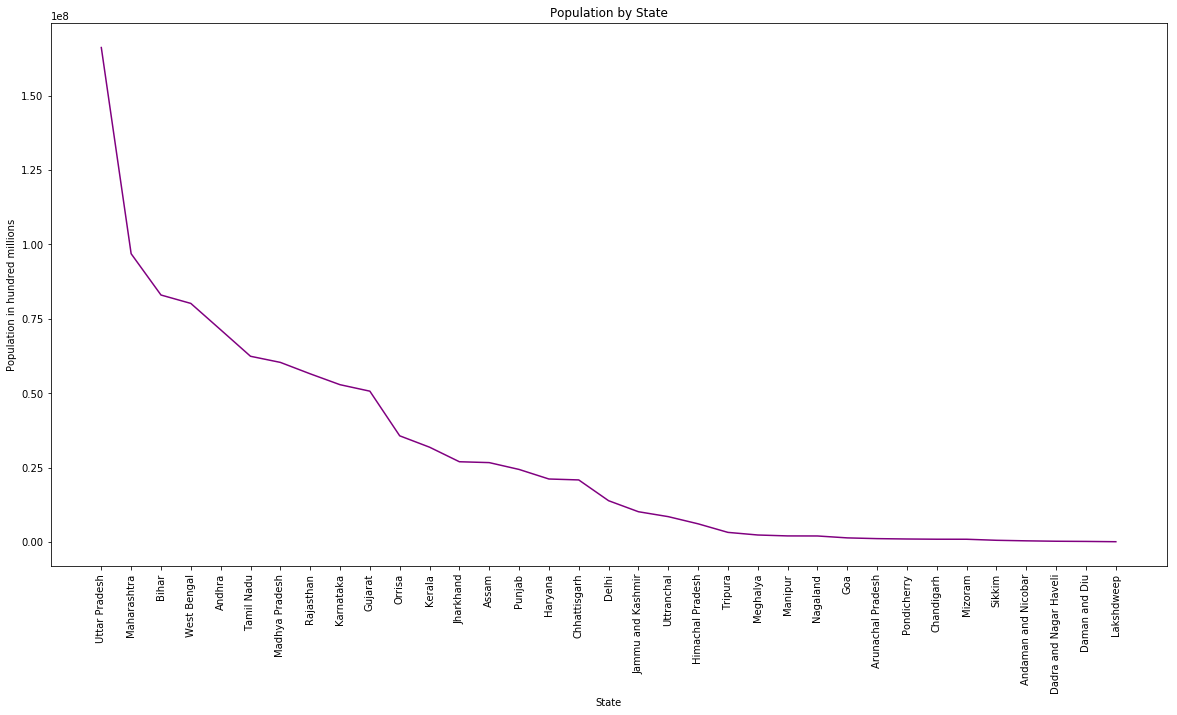

In [90]:

# Group the dataframe by States and sort from highest to lowest population
df = india_census.groupby('State').aggregate(np.sum)
df = df.sort_values(by='Persons', ascending=False)


plt.figure(figsize=(20, 10))
plt.plot(df['Persons'], color='purple')
plt.ylabel('Population in hundred millions')
plt.xlabel('State')
plt.title('Population by State')
plt.xticks(rotation='vertical')
plt.show()

Population in India varies widely by state. Uttar Pradesh, the most populous state, has almost 170,000,000 people. By contrast: Lakshdweep, the least populous state, has only 60,000. But even within Uttar Pradesh, what is the variance? Is most of that state's population from one big city, or is it evenly spread across the area?

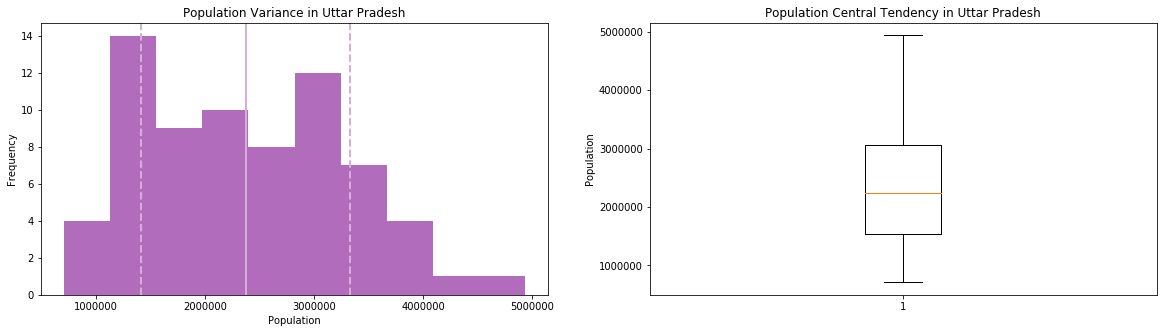


    Max: 4936105 
    Min: 708447 people. 
    Mean population: 2374256.0
    Standard deviation is 960086.0 people

    Max city population (India): 9610788


,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,...,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
586,West Bengal,District Medinipur,9610788,4916370,4694418,15.68,8626883,NaN,NaN,NaN,...,3560,175,878,2128.0,1807,4166,10016,20.1,40.5,39.4


In [91]:
UP = india_census.loc[lambda df: india_census['State'] == "Uttar Pradesh", :]
UP = UP.sort_values(by='Persons', ascending=False)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(UP.Persons, color='#B16DBC') 
plt.ylabel('Frequency')
plt.xlabel('Population')
plt.title('Population Variance in Uttar Pradesh')
# Add a vertical line at the mean.
plt.axvline(UP.Persons.mean(), color='#D8ADDD', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(UP.Persons.mean() + UP.Persons.std(), color='#D8ADDD', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(UP.Persons.mean()-UP.Persons.std(), color='#D8ADDD', linestyle='dashed', linewidth=2) 


plt.subplot(1, 2, 2)
plt.boxplot(UP.Persons)
plt.ylabel('Population')
plt.title('Population Central Tendency in Uttar Pradesh')
plt.show()

minimum_pop = UP.Persons.min()
maximum_pop = UP.Persons.max()
mean = round(UP.Persons.mean(), 0)
std = round(UP.Persons.std(), 0)
largest_pop = india_census.Persons.max()
largest_pop_state = india_census[india_census['Persons'] == largest_pop]


print("""
    Max: {} 
    Min: {} people. 
    Mean population: {}
    Standard deviation is {} people""".format(maximum_pop, minimum_pop, mean, std))

print("""
    Max city population (India): {}""".format(largest_pop))

largest_pop_state

The majority of Uttar Pradesh's population is evenly spread over districts, with a standard deviation of almost a million people. The smallest district in Uttar Pradesh has 708,447 people. The largest district has 493,6105 people. And the mean district population is 2,374,256 people. 

However, although Uttar Pradesh has the largest population as a state, it does not host the most populous district in India. District Medinipur of West Bengal had the single highest district population in India of 9,610,788 persons according to 2001 census data. 

However, it is also of note that this data is slightly misleading. Delhi is the most populous city in India. However, due to its classification as both a city and a state, it is broken up into several distinct districts, all of which host their own data in the 2001 census. However, if we combine population counts across Delhi, we can see that it is in fact the most populous city, at 13.85 million people 

In [92]:
Delhi =  india_census.loc[lambda df: india_census['State'] == "Delhi", :]
Delhi = Delhi.groupby('State').aggregate(np.sum)
Delhi

,Persons,Males,Females,Growth..1991...2001.,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Persons..literate,Males..Literate,...,Safe.Drinking.water,Electricity..Power.Supply.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Post..telegraph.and.telephone.facility,Permanent.House,Semi.permanent.House,Temporary.House
State,,,,,,,,,,,,,,,,,,,,,
Delhi,13850507,7607234,6243273,337.48,2733383.0,46.0,7385.0,7871.0,9664764,5700847,...,153.0,152.0,138.0,85.0,127.0,2.0,147.0,813.1,44.7,42.0


## 2. Was population growth from 1991 to 2001 equal across all states?

Above are the populations of India by state according to 2001 census data. But what about each state's growth since 1991? I next want to look at if population growth was equal across all states, or if some states have higher rates of growth than others.

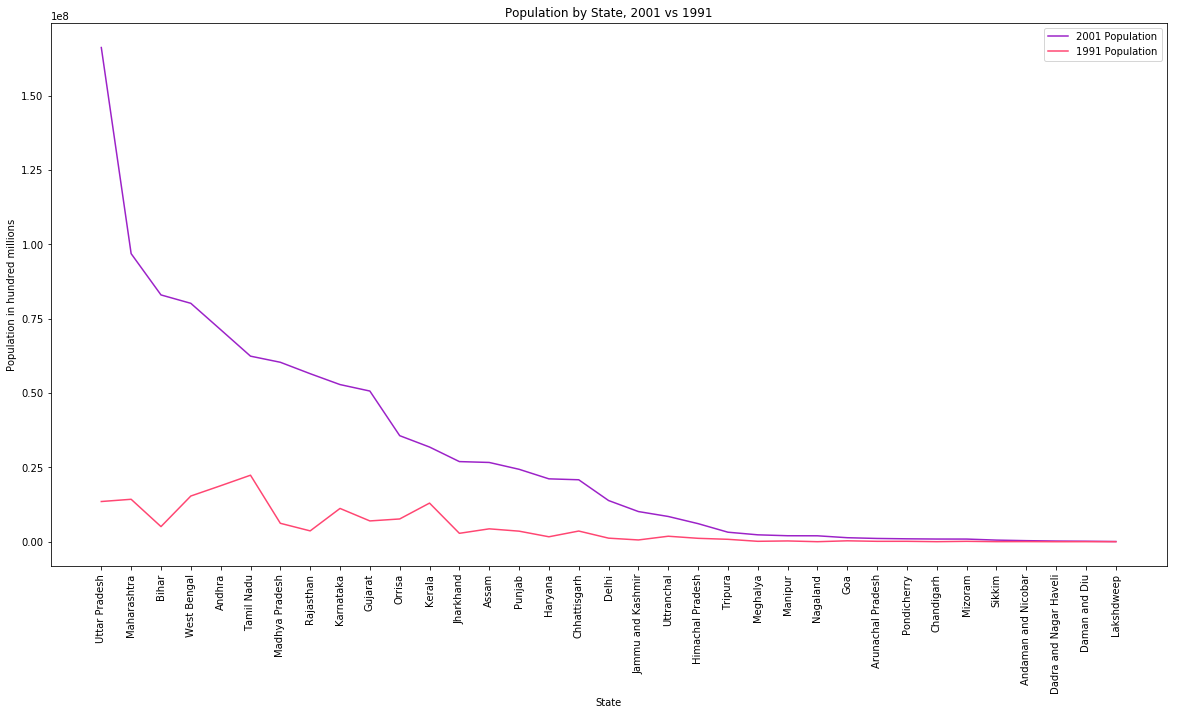

In [93]:
# Calculate the population of 1991 using our dataframe and the rate of growth from 1991 to 2001 in the 'Growth' index.

# Create a new column in our india_census dataframe of 1991 populations
# Since currently india_census['Growth'] is an object, we also need to change it 
# into a float so we can manipulate it numerically
# We calculate the 1991 population with the formula P(0) = P(t) e^-(r t), where P(t) is the 2001 population, P(0) is the 1991 population,
# and r is the rate of change, and 10 is the time t in years. e is the Euler's number, a mathematical constant

from math import e

india_census['Growth'] = pd.to_numeric(india_census['Growth..1991...2001.'], errors='coerce') 

india_census['1991 Population'] = india_census.Persons * (e ** (-(india_census.Growth/100) * 10))
india_census['2001 Population'] = india_census['Persons']


df = india_census.groupby('State').aggregate(np.sum)
df = df.sort_values(by='2001 Population', ascending=False)

#Now plot the 2001 population vs the 1991 population

plt.figure(figsize=(20, 10))
plt.plot(df['2001 Population'], color='#9C22C8')
plt.plot(df['1991 Population'], color='#FF4672')
plt.plot()
plt.ylabel('Population in hundred millions')
plt.xlabel('State')
plt.title('Population by State, 2001 vs 1991')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

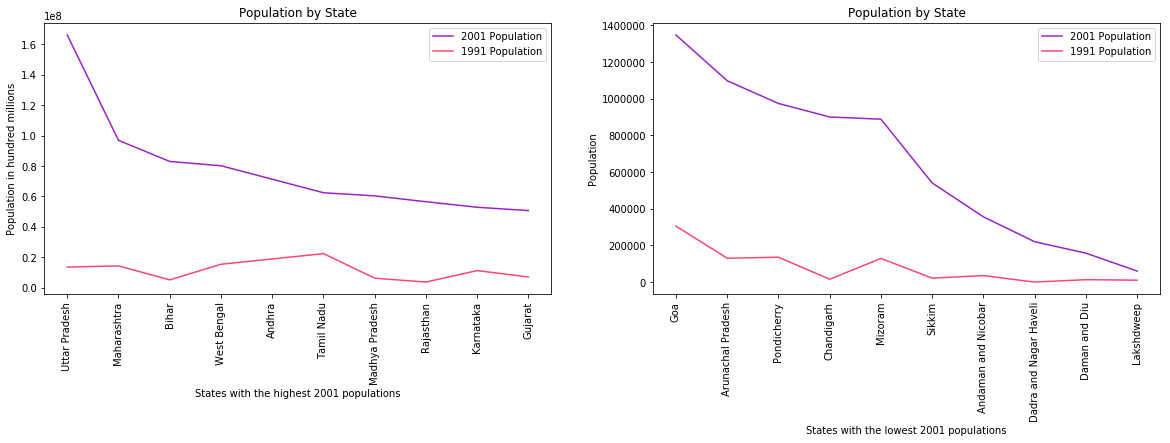

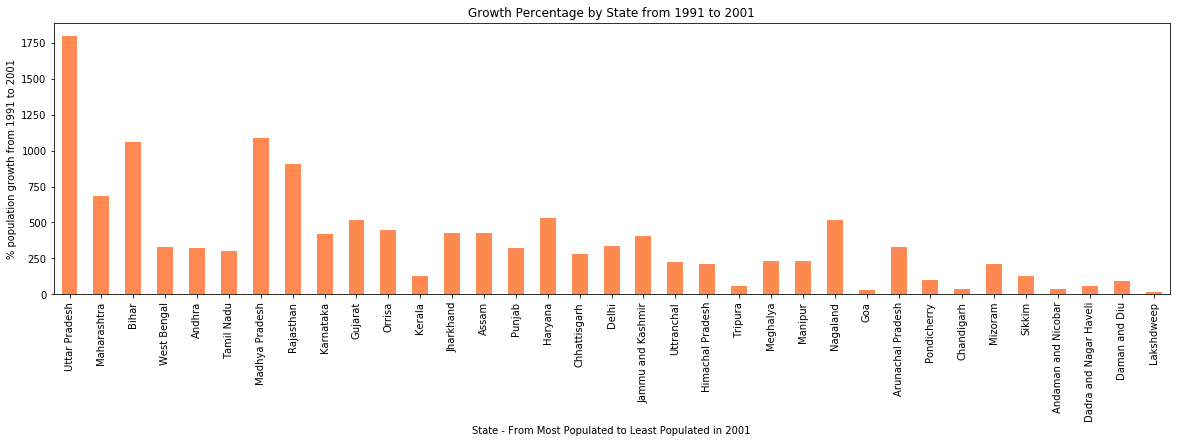


        Mean growth: 379.0 
        Max growth: 1799.2
        Min growth: 17.2



In [94]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(df['2001 Population'].head(10), color='#9C22C8')
plt.plot(df['1991 Population'].head(10), color='#FF4672')
plt.plot()
plt.xlabel('States with the highest 2001 populations')
plt.ylabel('Population in hundred millions')
plt.title('Population by State')
plt.xticks(rotation='vertical')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(df['2001 Population'].tail(10), color='#9C22C8')
plt.plot(df['1991 Population'].tail(10), color='#FF4672')
plt.plot()
plt.xlabel('States with the lowest 2001 populations')
plt.ylabel('Population')
plt.title('Population by State')
plt.xticks(rotation='vertical')
plt.legend()

plt.figure(figsize=(20, 5))
df.Growth.plot(kind='bar', color='#FF8951')
plt.ylabel('% population growth from 1991 to 2001')
plt.xlabel('State - From Most Populated to Least Populated in 2001')
plt.title('Growth Percentage by State from 1991 to 2001')

plt.show()

head_growth = df.Growth.head(10)
tail_growth = df.Growth.tail(10)

mean = np.mean(df['Growth']).round(0)
max_growth = round(df['Growth'].max(),1)
min_growth = round(df['Growth'].min(),1)

print("""
        Mean growth: {} 
        Max growth: {}
        Min growth: {}
""".format(mean, max_growth, min_growth))

### Insights

Growth was not equal across all states. Although the mean growth from 1991 to 2001 was 379%, the lowest growth rate was 17% and the highest was almost 1800%. These extreme values almost certainly impact the calculation of the mean rate of growth. However, they also can't be discounted. Uttar Pradesh likely boomed as they became very invested in information technology and even built a Technical University in 2000. As such, they became one of the biggest technical hubs in the entire country. Other states with a large IT presence include Tamil Nadu and Karnataka.

Similarly, the lack of growth in Lakshdweep makes sense since Lakshdweep is a tropical archipelago made up of atolls and coral reefs in the Laccadive Sea, off the coast of Kerala. Not all of the islands are inhabited, and only a few are open to visitors, with permits being required. Both the governmental restrictions, and space restrictions, would pevent growth from occuring as it did in states with larger landmass available, such as Rajasthan (comprable in area to Germany), Madhya Pradesh (comprable with Poland), or Maharashtra (comprable to Italy). 

It is of note that the states with the largest area are also states that in 2001 had some of the highest populations. This makes sense, since by definition states with more area have more room to build houses and other essential buildings.

## 3. Are Literacy Rates Skewed Toward Big Urban Areas?

Based on the above graphs, it might be expected that literacy rates in India tend positively toward states with the highest population, on the basis that the higher the population, the more urban areas per state. Let's look at literacy as a whole across India, as well as specific male and female literacy rates.

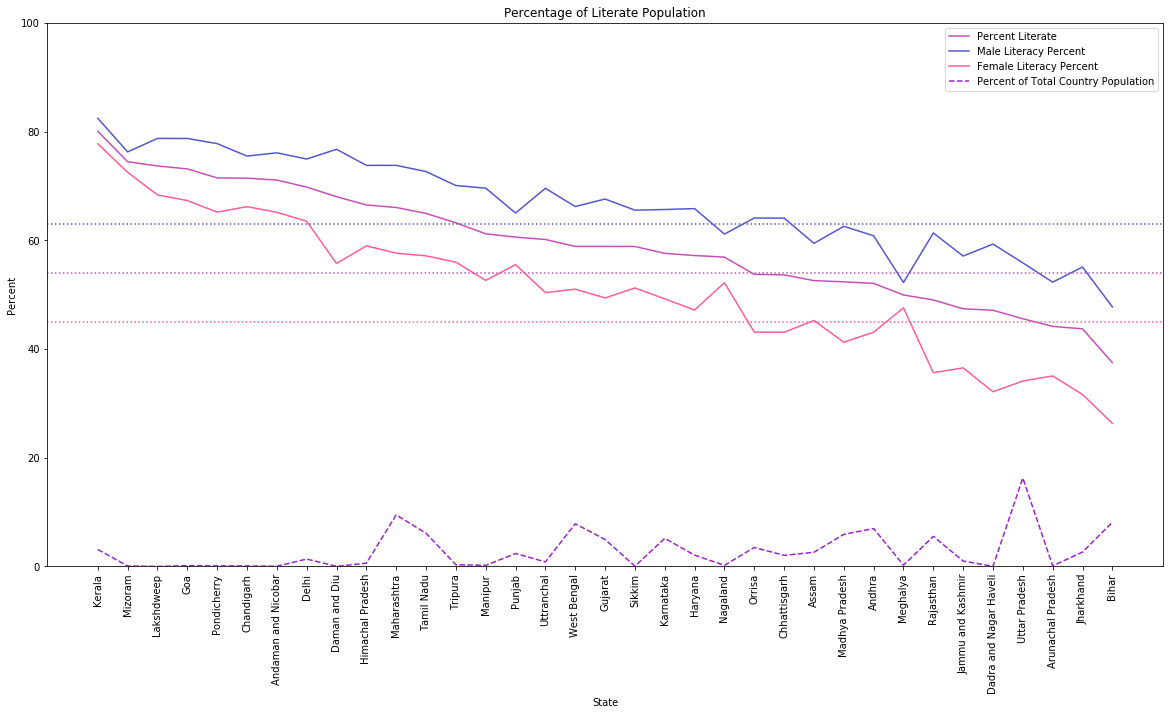


    Percent of total population: 54.0 
    Percent literate males: 63.0 
    Percent literate females: 45.0 


In [95]:
#Section the Data into states and sort by the literacy rate, as well as the percent of those literate who are male or female

df = india_census.groupby('State').aggregate(np.sum)

df['Percent Literate'] = df['Persons..literate'] / df['Persons']
df['Male Literacy Percent'] = df['Males..Literate'] / df['Males']
df['Female Literacy Percent'] = df['Females..Literate'] / df['Females']
total = india_census.Persons.sum()
df['Percent of Total Country Population'] = df['Persons'] / total * 100

mean_percent_all = round(sum(india_census['Persons..literate']) / sum(india_census['Persons'])*100, 0)
mean_percent_male = round(sum(india_census['Males..Literate']) / sum(india_census['Males'])*100, 0)
mean_percent_fem = round(sum(india_census['Females..Literate']) / sum(india_census['Females'])*100, 0)
 
    
df = df.sort_values(by='Percent Literate', ascending=False)


plt.figure(figsize=(20, 10))
plt.plot(df['Percent Literate']*100, color='#C74FB9')
plt.plot(df['Male Literacy Percent']*100, color='#5257CC')
plt.plot(df['Female Literacy Percent']*100, color='#FF5D93')
plt.plot(df['Percent of Total Country Population'], linestyle='dashed', color='#9C22C8')
plt.plot()

#Add in a dotted horizontal line for the mean literacy rate
plt.axhline(y=mean_percent_all, color='#C74FB9', linestyle='dotted')

#Add in a dotted horizontal line for the mean male literacy rate
plt.axhline(y=mean_percent_male, color='#5257CC', linestyle='dotted')

#Add in a dotted horizontal line for the mean female literacy rate
plt.axhline(y=mean_percent_fem, color='#FF5D93', linestyle='dotted')
plt.ylabel('Percent')
plt.xlabel('State')
plt.title('Percentage of Literate Population')
plt.ylim(0,100)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print('''
    Percent of total population: {} 
    Percent literate males: {} 
    Percent literate females: {} '''.format(mean_percent_all, mean_percent_male, mean_percent_fem))

Population by state doesn't seem to be a reliable indicator of literacy. Uttar Pradesh, with around 20% of India's total population in 2001, has literacy rates that are well below average. In addition, Lakshdweep and Goa -- two of India's smallest states by population -- have the third and fourth highest literacy rates, respectively.

Let's look at other factors that could come into play -- mainly, the religious makeup of the state, the education levels, and how poverty may play a role in literacy rates. 

## Can Religion Predict Literacy?

India has many religions, however this dataset breaks them up into 5 categories: Hinduism, Islam, Christianity, Buddhism, Sikhs, Jains, 'Other' and 'not stated'. Can the state's religious makeup give insight into their literacy rates?

Text(0.5, 42.0, 'Religion')

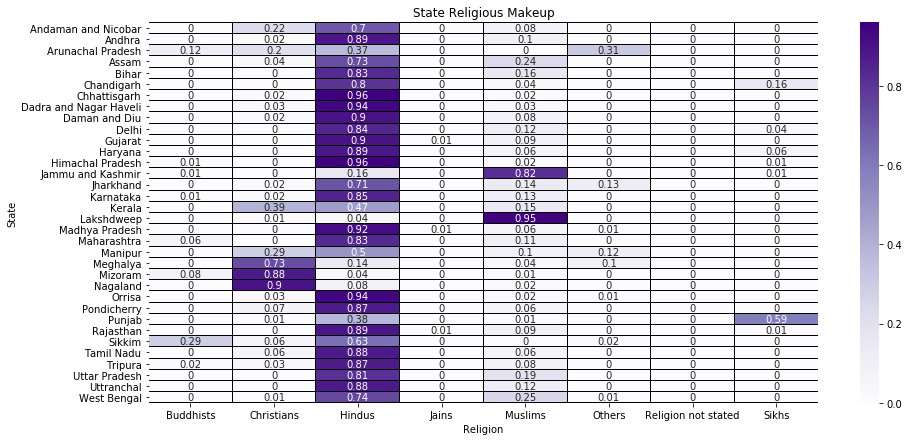

In [96]:
religion_cols = ['Religeon.1.Name','Religeon.1.Population',
                 'Religeon.2.Name','Religeon.2.Population',
                 'Religeon.3.Name','Religeon.3.Population']
temp = india_census[religion_cols + ['State']].copy()
for i in '123':
    temp['Religeon.'+i+'.Name'] = temp['Religeon.'+i+'.Name'].str.split('.').str[-1]
temp2 = pd.DataFrame([], columns=['Name', 'Population', 'State'])
for i in '123':
    a = temp[['Religeon.'+i+'.Name', 'Religeon.'+i+'.Population', 'State']].copy()
    a.columns = ['Name', 'Population', 'State']
    temp2 = pd.concat([a, temp2])
grouped = temp2.groupby(['State', 'Name']).sum()
temp2 = grouped.reset_index().fillna(1)
ct = pd.crosstab(temp2.State, temp2.Name, temp2.Population, aggfunc=np.sum)
ct = ct.fillna(1)

plt.figure(figsize=(15,7))
sns.heatmap(np.round(ct.T / ct.sum(axis=1), 2).T, cmap='Purples',
            linecolor='black', linewidths=0.01, annot=True)
plt.title('State Religious Makeup')
plt.xlabel('Religion')

India is, for the most part, astonishingly Hindu. This is not surprising. Of the four states that border Pakistan (Rajasthan, Gujarat, Jammu and Kashmir, and Punjab), Jammu and Kashmir is the only state with a significantly elevated Muslim population. 59% of Punjab's population are Sikhs, though that number is lower than I was expecting. Goa did not have religious information available.

Does religion influence literacy? Maybe.

- Kerala, the Indian state with the highest 2001 literacy rates, is 39% Christian, 47% Hindu, and 15% Muslim. 
- Mizoram, with the second highest literacy rate, is 8% Buddhist, 88% Christian, and only 4% Hindu.
- Lakshdweep is an astonishing 95% Muslim.
- Jharkhand, with the second lowest literacy rate, is 71% Hindu and 14% Muslim.
- Bihar, with the lowest literacy rate, is 83% Hindu and 16% Muslim.

From a glance, it appears that states with higher rates of Christianity trend toward higher literacy rates overall, with lower gender variance. However, Meghalya, a state that is 73% Christian, has the 7th lowest literacy rate. While Lakshdweep is 95% Muslim with one of the highest literacy rates, it is important to remember that it is a tiny island and has the smallest state population of India by far. The only other majority-Muslim state, Jammu and Kashmir, has the 6th lowest literacy rates in the country. 

Religion seems to tell us little about literacy, though there are a few conclusions to be made. On average, states with higher rates of Christianity tend to have higher literacy rates, as do the states with large Buddhist and Sikh populations. States with majority-Muslim people tend to have literacy rates below the country's average, and almost all have below-average female literacy rates.

## Does Housing Stability Impact Literacy Rates?


Text(0.5, 1.0, 'Housing Makeup by State')

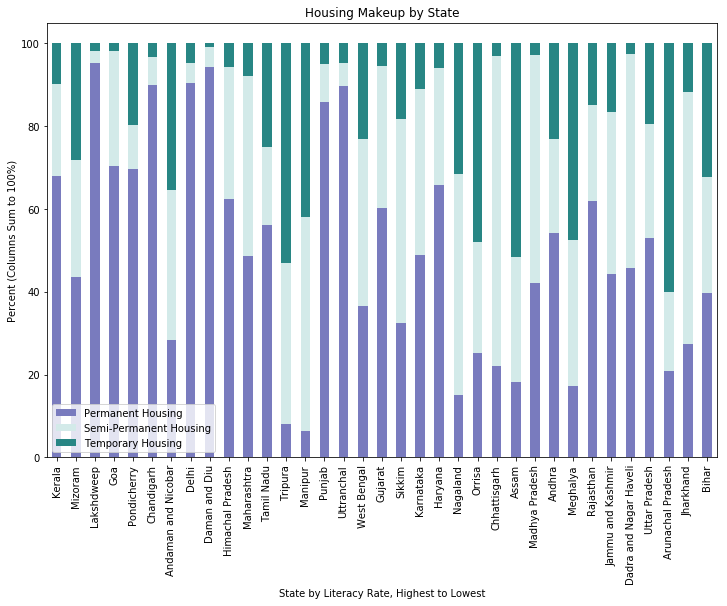

In [97]:
temp = df.groupby('State').sum()
Total = temp['Total Housing'] = temp['Permanent.House'] + temp['Semi.permanent.House'] + temp['Temporary.House']
temp = temp.sort_values(by='Percent Literate', ascending=False)
temp['Permanent Housing'] = (temp['Permanent.House'] / temp['Total Housing']) *100
temp['Semi-Permanent Housing'] = (temp['Semi.permanent.House'] / temp['Total Housing']) * 100
temp['Temporary Housing'] = (temp['Temporary.House'] / temp['Total Housing']) * 100

l = np.array(temp[['Permanent Housing','Semi-Permanent Housing','Temporary Housing']])
l.shape

df4 = pd.DataFrame(l, columns= ['Permanent Housing','Semi-Permanent Housing','Temporary Housing'], index=temp.index)
df4.plot.bar(figsize=(12,8),stacked=True, color=['#797BBE', '#D3EAE9', '#288684'])
ylim = (0,100)
plt.xlabel('State by Literacy Rate, Highest to Lowest')
plt.ylabel('Percent (Columns Sum to 100%)')
plt.title('Housing Makeup by State')

## Analysis and Conclusion 

Overall, housing stability seems to be the biggest indicator of literacy rates in India, regardless of state population. States with high percentages of permanent housing tend to also have higher literacy rates across the board, such as Kerala, Goa, Lakshdweep, Chandigarh, and Delhi. States with unstable housing situations (both temporary and semi-permanent) -- such as Meghalya, Dadra and Nagar Haveli, and Arunachal Pradesh -- tend to have lower literacy rates. 

Religion does factor into literacy, though it does not seem as impactful as I originally expected. For example, while Jammu and Kashmir has one of the highest rates of Islam in the country, it was a war-torn country with a conflict that continues to this day. More analysis is needed to know if religion really does play a role in education and literacy, especially when it comes down to divergence in male and female literacy rates.

It is not a far leap to suggest that housing stability begets income or financial stability. People with more income and financial security will choose to live in permanent housing over temporary, and people with no financial security may not have a choice beyond living in temporary or semi-permanent housing.

Further research that could be done into this dataset, as I learn in the bootcamp on Thinkful, would be both to find other indications of income (such as scheduled caste proportions, as well as medical facilities, clean water facilities, telephone and telegraph facilities, and proportion of mud access roads to paved access roads) and see how they compare, both to the housing demographic as well as literacy rates. I would also in the future like to look into specific outliers and elbows in the data to see what external influences are in those specific cases.

Ultimately, as my skills develop, I would love to return to this dataset and attempt a choropleth map to further analyze literacy rates throughout the country, as well as religious and population data. 